\pagebreak

In [28]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
df_22 = pd.read_csv('../22/FERIT Znanost 2022.csv')
df_23 = pd.read_csv('FERIT Znanost 2023.csv')

columns_22 = [
    'time',
    'studij',
    'godina',
    'upoznatost-fakultet',
    'upoznatost-nastavnik',
    'strucnjaci',
    'upoznatost-ig',
    'vrijeme-nastavnik',
    'vrijeme-doktorand',
    'procitani-radovi',
    'zainteresiranost-studij',
    'zainteresiranost-doktorski',
    'zainteresiranost-druga',
    'komentar'
]

columns_23 = [
    'time',
    'studij',
    'godina',
    'upoznatost-fakultet',
    'upoznatost-nastavnik',
    'strucnjaci',
    'upoznatost-ig',
    'vijesti-stup',
    'vijesti-mail',
    'vijesti-mreze',
    'vijesti-kolege',
    'vijesti-nastavnik',
    'vrijeme-nastavnik',
    'vrijeme-doktorand',
    'procitani-radovi',
    'zainteresiranost-studij',
    'zainteresiranost-doktorski',
    'zainteresiranost-druga',
    'upoznatost-meeting',
    'upoznatost-dds',
    'upoznatost-sst',
    'komentar'
]

def clear_df(df, columns):
  questions = df.columns
  questions = [q.replace('[', '').replace(']', '').replace('Upoznatost sa znanstvenim radom ', '').replace('Primanje vijesti s FERIT-a ', '') for q in questions]
  question_to_column_name = dict(list(zip(columns, questions)))
  df.columns = columns
  df.studij = df.studij.replace('Diplomski Automobilsko računarstvo i komunikacije', 'Diplomski Automobilsko')
  return df, question_to_column_name

df_22, question_to_column_name_22 = clear_df(df_22, columns_22)
df_22['year'] = 2022
df_23, question_to_column_name_23 = clear_df(df_23, columns_23)
df_23['year'] = 2023

## Sažetak

Glavni zaključci ankete su sljedeći:

-   **Oko 50 % ispitanika (oko 50 studenata) je zainteresirano za sudjelovanje na znanstvenim radovima tijekom studija.** Otprilike je zainteresiranost ravnomjerno raspoređena po svim godinama studija.
-   Međutim, samo petina studenata smatra da je informirana o znanstvenom radu fakulteta i istraživačkim grupama.
-   Studenti vjeruju da nastavnici i doktorandi koriste preko 40 % svojeg vremena na znanost i nemaju loše mišljenje o znanstvenoj kompetenciji njihovih nastavnika.
-   U odnosu na 2022. godinu, studenti su **otprilike jednako zainteresirani** za znanstveni rad i malo više zainteresirani za poslijediplomski studij. Međutim, studenti 2023. godine se **osjećaju manje informirano** o znanstvenim aktivnostima fakulteta.
-   Unatoč mišljenu o neinformiranosti, **više od pola studenata je čulo za Dan Doktorskih Studija** i Ph.D. meet.ing, dok je manje od 15 % čulo za SST konferenciju.
-   **STUP je najmanje značajan kanal** preko kojeg studenti dobivaju informacije. Najviše informacija dobivaju mailom i od kolega.
-   Porastao je broj znanstvenih radova koji studenti čitaju tijekom svog studija.

Zaključci upućuju na to da su studenti i dalje **zainteresirani** za znanstvenom radu. Iako je informiranost u nekim mjerama porasla, i dalje Povjerenstvo treba raditi na informiranju, posebice putem drugih kanala. S obzirom na zainteresiranost, potrebno je pružati prilike studentima za znanstveni rad putem popularizacije znanosti, gostujućih predavanja, **naprednijih tema za diplomske i završne radove**, sudjelovanjima na projektima, **stručnim praksama** i sl.

**Cijela anketa**:

<https://docs.google.com/forms/d/e/1FAIpQLSfnJNeyYjoQkvoUvGq1VNy8v92bfTyblDIygjcluPEKW8FBzA/viewform?usp=sf_link>

\pagebreak

## Distribucija odgovora

In [29]:
#| echo: false
#| output: asis
print(f'Ukupno ima {len(df_23)} ispitanika.')

Ukupno ima 104 ispitanika.


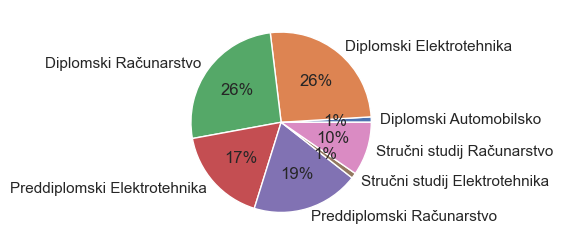

In [30]:
#| echo: false
plt.figure()
plt.subplot(1, 2, 1)
df_plot = df_23.groupby(['studij']).size()
df_plot.plot(kind='pie', autopct='%.0f%%');

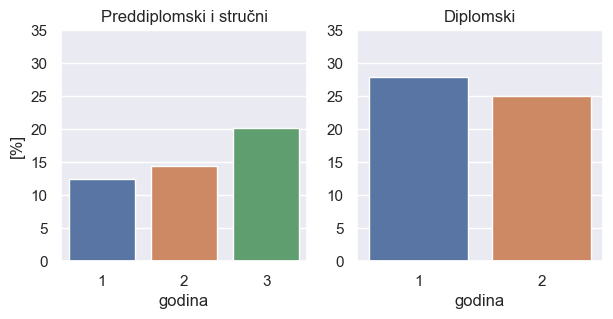

In [31]:
#| echo: false
df_23_dipl = (df_23[(df_23['studij'].str.contains('Diplomski'))].groupby(['godina']).size() / len(df_23)) * 100
df_23_pred = (df_23[(df_23['studij'].str.contains('Predd')) | (df_23['studij'].str.contains('Stručni'))].groupby(['godina']).size() / len(df_23)) * 100

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x=df_23_pred.index, y=df_23_pred.values)
plt.title('Preddiplomski i stručni')
plt.ylabel('[%]')
plt.ylim(0, 35)
plt.subplot(1, 2, 2);
plt.title('Diplomski')
plt.ylim(0, 35)
sns.barplot(x=df_23_dipl.index, y=df_23_dipl.values);

## Upoznatost i mišljenje o znanosti na fakultetu

### Upoznat/a sam sa znanstvenim radom fakulteta / nastavnika / istraživačkim grupama

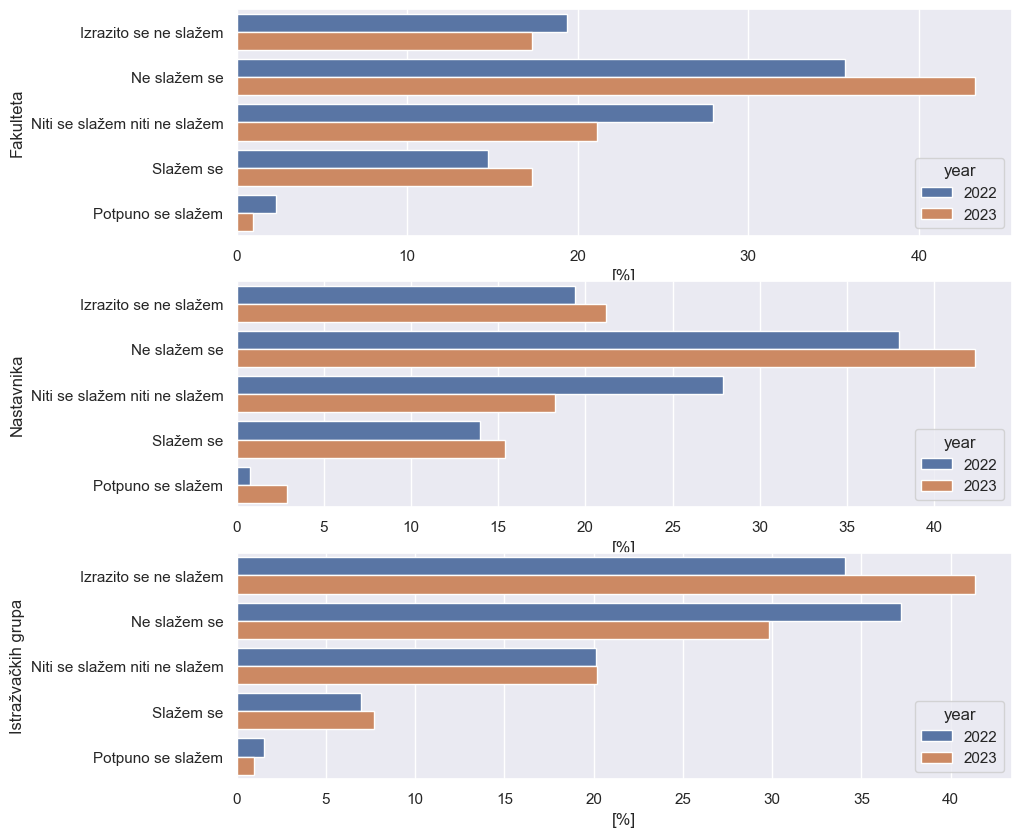

In [32]:
#| echo: false
order = ['Izrazito se ne slažem', 'Ne slažem se', 'Niti se slažem niti ne slažem', 'Slažem se', 'Potpuno se slažem']

# three rows
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'upoznatost-fakultet'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
df_plot['upoznatost-fakultet'] = pd.Categorical(df_plot['upoznatost-fakultet'], order)
sns.barplot(y='upoznatost-fakultet', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('Fakulteta')

plt.subplot(3, 1, 2)

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'upoznatost-nastavnik'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
df_plot['upoznatost-nastavnik'] = pd.Categorical(df_plot['upoznatost-nastavnik'], order)
sns.barplot(y='upoznatost-nastavnik', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('Nastavnika')

plt.subplot(3, 1, 3)

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'upoznatost-ig'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
df_plot['upoznatost-ig'] = pd.Categorical(df_plot['upoznatost-ig'], order)
sns.barplot(y='upoznatost-ig', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('Istražvačkih grupa');

### Moji su nastavnici stručnjaci u svojem polju koji aktivno doprinose znanstvenoj zajednici

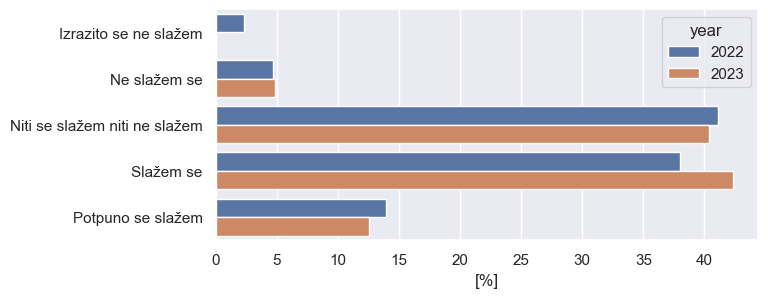

In [33]:
#| echo: false
plt.figure(figsize=(7, 3))
df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'strucnjaci'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
df_plot['strucnjaci'] = pd.Categorical(df_plot['strucnjaci'], order)
sns.barplot(y='strucnjaci', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('');

## Koliki postotak svojeg vremena nastavnik / doktoranda provodi na znanstvene aktivnosti (prema mišljenju studenata)

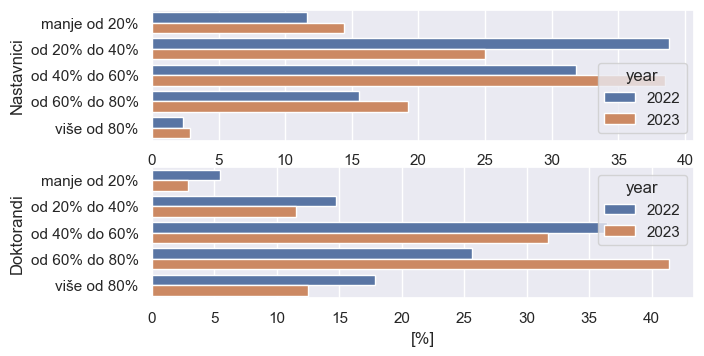

In [34]:
#| echo: false
plt.figure(figsize=(7, 3.75))
plt.subplot(2, 1, 1)

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'vrijeme-nastavnik'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
sns.barplot(y='vrijeme-nastavnik', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('Nastavnici')

plt.subplot(2, 1, 2)

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'vrijeme-doktorand'], group_keys=False).size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
sns.barplot(y='vrijeme-doktorand', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('Doktorandi');

\pagebreak

## Zainteresiranost studenata za znanost

### Broj pročitanih znanstvenih radova tijekom dosadašnjeg školovanja

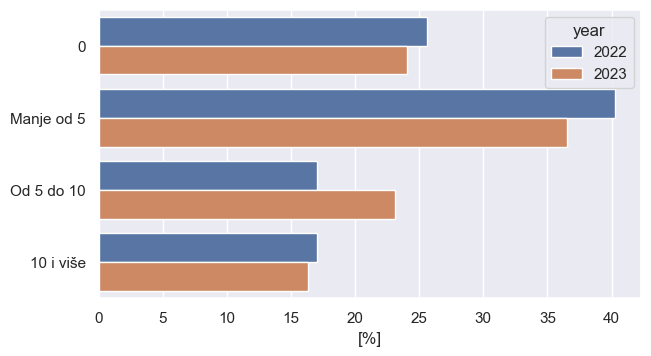

In [35]:
#| echo: false
# column: procitani-radovi
plt.figure(figsize=(7, 3.75))

order = ['0', 'Manje od 5', 'Od 5 do 10', '10 i više']

df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
df_plot = df_plot.groupby(['year', 'procitani-radovi'], group_keys=False)
# convert to percentage within year
df_plot = df_plot.size().reset_index(name='count')
df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)

df_plot['procitani-radovi'] = pd.Categorical(df_plot['procitani-radovi'], order)
sns.barplot(y='procitani-radovi', x='count', hue='year', data=df_plot, orient='h')
plt.xlabel('[%]')
plt.ylabel('');


### Zainteresiranost za znanost

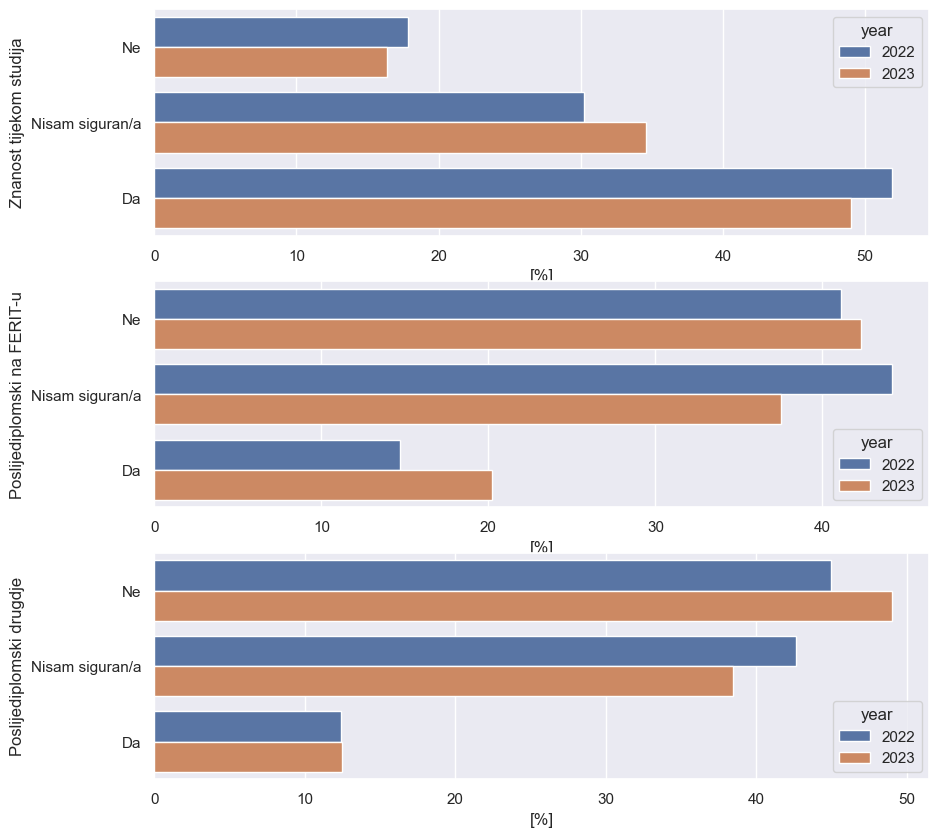

In [36]:
#| echo: false

plt.figure(figsize=(10, 10))
order = ['Ne', 'Nisam siguran/a', 'Da']
columns = ['zainteresiranost-studij', 'zainteresiranost-doktorski', 'zainteresiranost-druga']
titles = ['Znanost tijekom studija', 'Poslijediplomski na FERIT-u', 'Poslijediplomski drugdje']

for i in range(3):
  column = columns[i]
  plt.subplot(len(columns), 1, i + 1)
  df_plot = pd.concat([df_22, df_23], axis=0, join='inner')
  df_plot = df_plot.groupby(['year', column], group_keys=False).size().reset_index(name='count')
  df_plot['count'] = df_plot.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)
  df_plot[column] = pd.Categorical(df_plot[column], order)
  sns.barplot(y=column, x='count', hue='year', data=df_plot, orient='h')
  plt.xlabel('[%]')
  plt.ylabel(titles[i])



# df = pd.concat([df_22, df_23], axis=0, join='inner')
# df_plot_0 = df.groupby(['year', 'zainteresiranost-studij'])
# # convert to percentage within year
# df_plot_0 = df_plot_0.size().reset_index(name='count')
# df_plot_0['count'] = df_plot_0.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)

# df_plot_1 = df.groupby(['year', 'zainteresiranost-doktorski'])
# # convert to percentage within year
# df_plot_1 = df_plot_1.size().reset_index(name='count')
# df_plot_1['count'] = df_plot_1.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)

# df_plot_2 = df.groupby(['year', 'zainteresiranost-druga'])
# # convert to percentage within year
# df_plot_2 = df_plot_2.size().reset_index(name='count')
# df_plot_2['count'] = df_plot_2.groupby(['year'], group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)

# # melt
# df_plot = pd.concat([df_plot_0, df_plot_1, df_plot_2], axis=0, join='inner')
# df_plot = df_plot.melt(id_vars=['year', 'count']).rename(columns=str.title)
# df_plot['variable'] = df_plot['variable'].replace(question_to_column_name_23)
# df_plot['variable'] = pd.Categorical(df_plot['variable'], order)
# sns.barplot(y='variable', x='count', hue='year', data=df_plot, orient='h')
# plt.xlabel('[%]')
# plt.ylabel('')

#### Tko je zainteresiran za znanost tijekom studija?

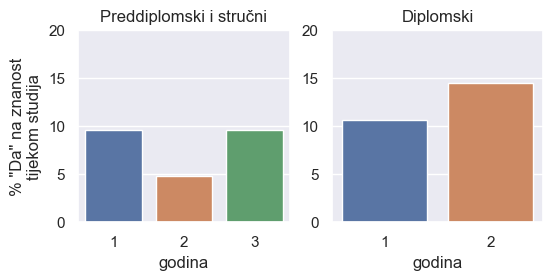

In [37]:
#| echo: false
df_23_znan = df_23[df_23['zainteresiranost-studij'] == 'Da']
df_23_dipl = (df_23_znan[(df_23_znan['studij'].str.contains('Diplomski'))].groupby(['godina']).size() / len(df_23)) * 100
df_23_pred = (df_23_znan[(df_23_znan['studij'].str.contains('Predd')) | (df_23_znan['studij'].str.contains('Stručni'))].groupby(['godina']).size() / len(df_23)) * 100

plt.figure(figsize=(6, 2.5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_23_pred.index, y=df_23_pred.values)
plt.title('Preddiplomski i stručni')
plt.ylabel('% "Da" na znanost\ntijekom studija')
plt.ylim(0, 20)
plt.subplot(1, 2, 2);
plt.title('Diplomski')
plt.ylim(0, 20)
sns.barplot(x=df_23_dipl.index, y=df_23_dipl.values);

#### Tko je zainteresiran za poslijediplomski studij?

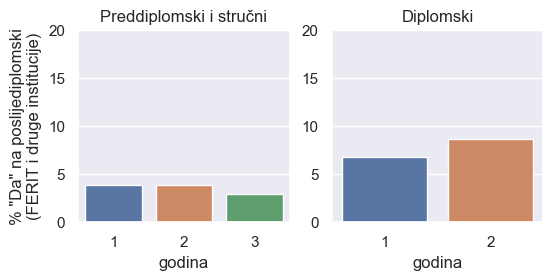

In [38]:
#| echo: false
df_23_znan = df_23[(df_23['zainteresiranost-druga'] == 'Da') | (df_23['zainteresiranost-doktorski'] == 'Da')]
df_23_dipl = (df_23_znan[(df_23_znan['studij'].str.contains('Diplomski'))].groupby(['godina']).size() / len(df_23)) * 100
df_23_pred = (df_23_znan[(df_23_znan['studij'].str.contains('Predd')) | (df_23_znan['studij'].str.contains('Stručni'))].groupby(['godina']).size() / len(df_23)) * 100

plt.figure(figsize=(6, 2.5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_23_pred.index, y=df_23_pred.values)
plt.title('Preddiplomski i stručni')
plt.ylabel('% "Da" na poslijediplomski\n(FERIT i druge institucije)')
plt.ylim(0, 20)
plt.subplot(1, 2, 2);
plt.title('Diplomski')
plt.ylim(0, 20)
sns.barplot(x=df_23_dipl.index, y=df_23_dipl.values);

## Kako studenti primaju informacije?

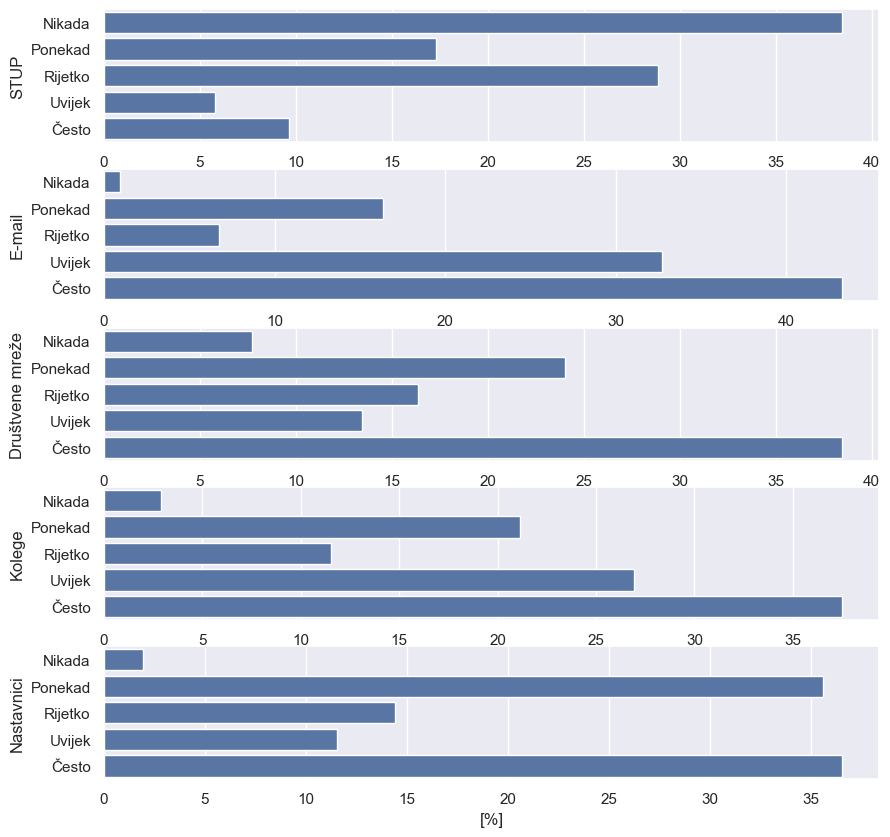

In [39]:
#| echo: false

columns = [
    'vijesti-stup',
    'vijesti-mail',
    'vijesti-mreze',
    'vijesti-kolege',
    'vijesti-nastavnik'
]

titles = [
    'STUP',
    'E-mail',
    'Društvene mreže',
    'Kolege',
    'Nastavnici'
]

plt.figure(figsize=(10, 10))

order = ['Nikada' 'Rijetko' 'Ponekad' 'Često' 'Uvijek']

for i in range(len(columns)):
    column = columns[i]
    plt.subplot(len(columns), 1, i + 1)
    # plot percentage of each answer, ignore year
    df_plot = df_23.copy()
    df_plot = df_plot.groupby([column]).size().reset_index(name='count')
    df_plot['count'] = df_plot['count'] / len(df_23) * 100
    #df_plot[column] = pd.Categorical(df_plot[column], order)
    sns.barplot(y=column, x='count', data=df_plot, orient='h', color='C0')
    plt.xlabel('[%]')
    plt.ylabel(titles[i])

## Popularnost FERIT-ovih znanstvenih događaja

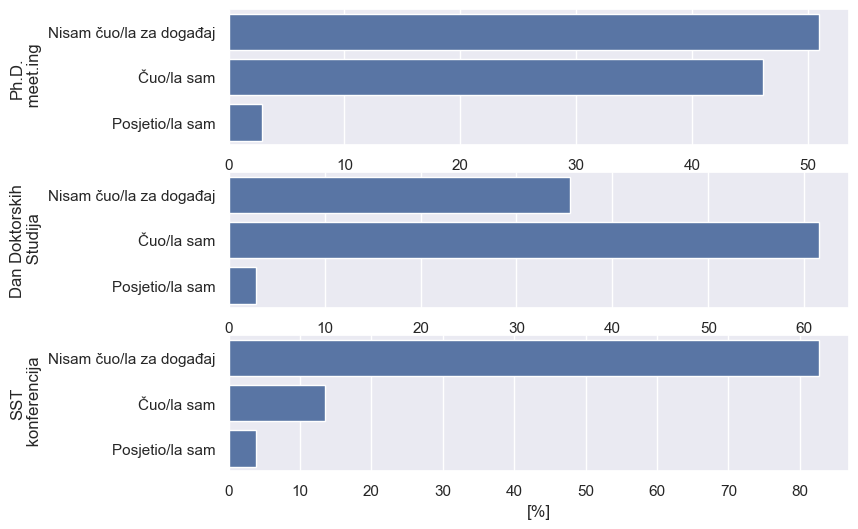

In [40]:
#| echo: false
columns = [
  'upoznatost-meeting',
  'upoznatost-dds',
  'upoznatost-sst',
]

titles = [
  'Ph.D.\n meet.ing',
  'Dan Doktorskih\n Studija',
  'SST\n konferencija',
]

plt.figure(figsize=(8, 6))

order = ['Nisam čuo/la za događaj', 'Čuo/la sam', 'Posjetio/la sam']

for i in range(len(columns)):
    column = columns[i]
    plt.subplot(len(columns), 1, i + 1)
    # plot percentage of each answer, ignore year
    df_plot = df_23.copy()
    df_plot = df_plot.groupby([column]).size().reset_index(name='count')
    df_plot['count'] = df_plot['count'] / len(df_23) * 100
    df_plot[column] = pd.Categorical(df_plot[column], order)
    sns.barplot(y=column, x='count', data=df_plot, orient='h', color='C0')
    plt.xlabel('[%]')
    plt.ylabel(titles[i])